#### George Nakhleh
#### CSC 478: Assignment 2
#### Data Analysis and Predictive Modeling on Census data

Problem uses a modified version of the Adult Census Data Set.  
- Dataset: [adult-modified.csv](http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/adult-modified.csv)  


**3a) Preprocessing and data analysis**  
- Examine data for missing values. Remove for categorical attributes, for numeric imput and fill-in using attribute's mean  
- Examine characteristics of the attributes (relevant stats, histograms, bar graphs, etc)  
- Perform crosstabs (including bar charts):  
  - Education **x** Race  
  - Work-class **x** Income  
  - Work-class **x** Race  
    - Create table or chart showing % of each race category that falls in the low-income group. 
- Compare and contrast characteristics of low-income and high-income categories across diff. attributes

In [2]:
#Load in libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#Import data
census_df = pd.read_csv('adult-modified.csv')

#Start looking at data
census_df.head(6)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K


**EDA**  
Understanding the dataset and its variables

In [4]:
#Size of the dataset
census_df.shape

(10000, 8)

In [7]:
#Summarize the variables
census_df.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000
unique,72,4,NaN,2,5,2,NaN,2
top,31,Private,NaN,Single,White,Male,NaN,<=50K
freq,284,6947,NaN,5017,8556,6703,NaN,7621
mean,NaN,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,NaN,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,NaN,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,NaN,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [11]:
#Find missing values in the dataset
census_df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

Missing values: turns out they are marked w/ **'?'**  
Columns w/ missing values:  
- `age`  
- `workclass`

In [22]:
#... hmm well we wouldn't have these instructions if they weren't in there, right?

pd.set_option('max_rows', 100)

for column in census_df.columns:
    print("\n{} \n".format(column), census_df[column].value_counts(), "\n")


age 
 31    284
35    270
34    268
23    267
33    267
25    266
30    263
37    262
20    253
32    251
41    251
29    250
36    249
28    249
27    247
40    242
26    241
24    240
39    239
22    238
43    236
47    235
46    234
42    228
38    228
19    224
44    223
21    214
45    204
?     198
49    190
51    184
50    165
18    160
48    154
52    143
53    142
55    121
54    119
58    112
57    110
56    109
17    102
59    101
60     89
61     88
63     79
64     68
62     61
65     45
66     44
67     42
69     33
68     30
70     23
73     21
76     17
71     17
75     17
90     16
74     15
72     15
77     11
78      8
79      7
80      6
81      6
84      3
83      2
82      2
88      1
85      1
Name: age, dtype: int64 


workclass 
 Private     6947
Public      1317
Self-emp    1148
?            588
Name: workclass, dtype: int64 


education 
 9     3232
10    2305
13    1630
14     531
11     416
7      363
12     318
6      295
4      205
15     174
5      153


In [38]:
census_df.isin(['?']).any()

age                True
workclass          True
education         False
marital-status    False
race              False
sex               False
hours-per-week    False
income            False
dtype: bool

In [44]:
#We should really be treating age as a numeric variable
#But can't do that until get rid of the ?, but we need the mean too
#Cute way

#Convert '?' values in age column to the mean value of all other age values
census_df.age[census_df['age'] == '?'] = int(census_df.age[census_df['age'] != '?'].astype(int).mean())

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
census_df.age = census_df.age.apply(int)

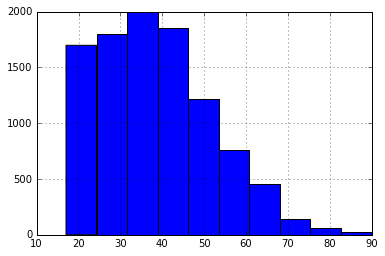

In [52]:
census_df.age.hist()

In [54]:
#For workclass, we are just going to remove those rows

census_df_reduced = census_df[census_df['workclass'] != '?']

In [53]:
census_df.shape

(10000, 8)

In [55]:
census_df_reduced.shape

(9412, 8)

In [56]:
#How did that change the data?
census_df_reduced.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.357310,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962135,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


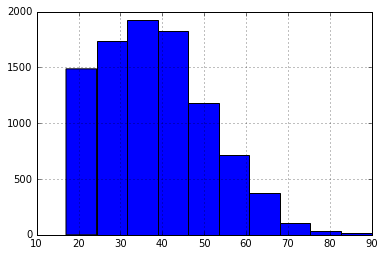

In [68]:
census_df_reduced.age.hist()

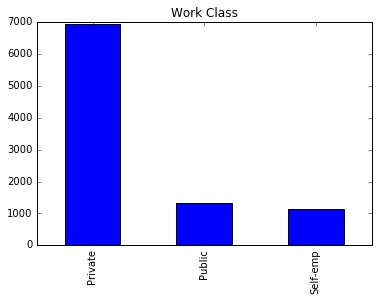

In [66]:
census_df_reduced.workclass.value_counts().plot.bar(title='Work Class')

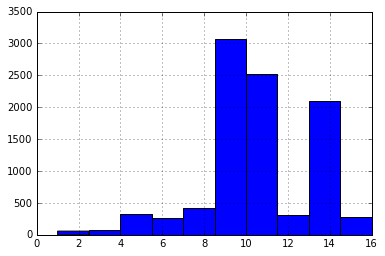

In [69]:
census_df_reduced.education.hist()

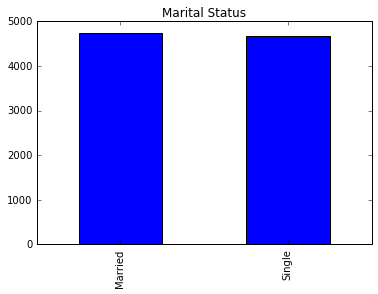

In [71]:
census_df_reduced['marital-status'].value_counts().plot.bar(title='Marital Status')

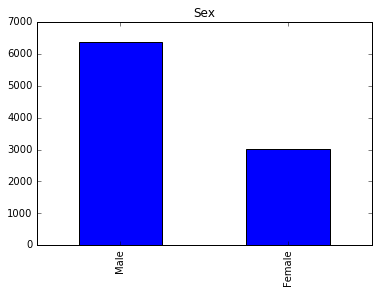

In [74]:
census_df_reduced['sex'].value_counts().plot.bar(title='Sex')

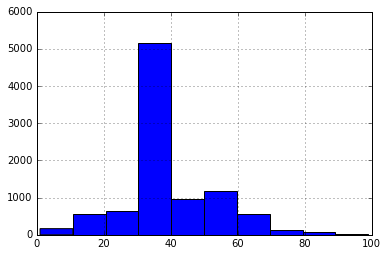

In [78]:
census_df_reduced['hours-per-week'].hist()

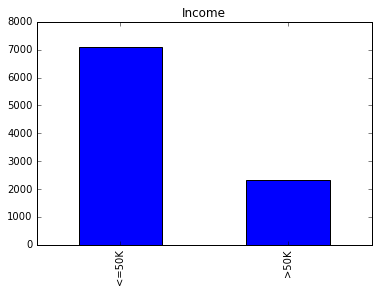

In [79]:
census_df_reduced['income'].value_counts().plot.bar(title='Income')